map 1 23.545325665086377 24.2249862302283
map 2 23.596029544863637 24.365151970548776
0.8851742675040519


Text(0, 0.5, 'Deviation of detected energy\nfrom mean, %')

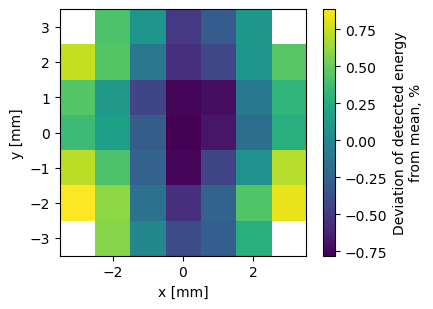

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

map1 = np.loadtxt("for_conference_efficiency_mesh1.txt")
map2 = np.loadtxt("for_conference_efficiency_mesh2.txt")

mesh = (map1 + map2) / 2

mesh_mean_primary = np.mean(mesh)

mesh[0,0] = mesh_mean_primary
mesh[0,6] = mesh_mean_primary
mesh[6,0] = mesh_mean_primary
mesh[6,6] = mesh_mean_primary


mesh /= np.mean(mesh)

# cast mesh to be in persent and substract 100% for better representation
mesh = (mesh-1)*100


print(np.max(np.abs(mesh)))

mesh[0,0] = np.inf
mesh[0,6] = np.inf
mesh[6,0] = np.inf
mesh[6,6] = np.inf

plt.figure(figsize=( 6.4*(2/3), 4.8*(2/3) ) )

plt.imshow(np.transpose(mesh)[::-1,:], extent=(-3.5, 3.5, -3.5, 3.5))

plt.xlabel("x [mm]")
plt.ylabel("y [mm]")

cbar = plt.colorbar()
cbar.ax.set_ylabel("Deviation of detected energy\nfrom mean, %")

In [2]:
from scipy.optimize import curve_fit 

def dispHistAndGauss(ax, data):

    # n_bins = int(np.sqrt(data.size))
    n_bins = 50
    bin_size = (np.max(data) - np.min(data))/n_bins

    histCounts, edges, _ = ax.hist(data, bins = n_bins)
    binCenters = (edges[1:] + edges[:-1])/2

    gaussFunc = lambda x, A, mu, sig: A*np.exp(-(x-mu)**2/sig**2/2)
    mu = np.mean(data)
    sig = np.std(data, ddof=1)
    A = data.size/(np.sqrt(2*np.pi)*sig)*bin_size
    p0 = (A, mu, sig)

    (A, mu, sig), _ = curve_fit(gaussFunc, binCenters, histCounts , p0=p0)

    x_gauss = np.linspace(np.min(data), np.max(data), 4*n_bins)
    y_gauss = gaussFunc(x_gauss, A, mu, sig)

    ax.plot(x_gauss, y_gauss, "r", label="$\sigma={:.2e}$\n$\mu={:.2e}$".format(sig, mu))
    ax.set_xlabel("$(\\tilde{E}_{ecs} - E_{ecs})/E_0$")
    ax.legend()

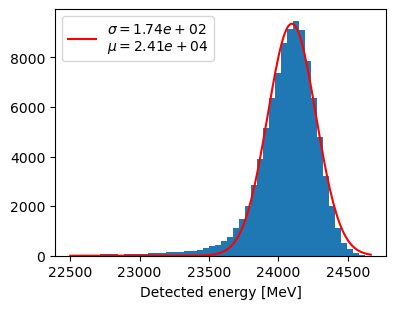

In [3]:
eDep_uniform_source1 = np.loadtxt("for_conference_eDep_uniform_source1.txt")
eDep_uniform_source2 = np.loadtxt("for_conference_eDep_uniform_source2.txt")

eDep_uniform_source = np.concatenate([eDep_uniform_source1, eDep_uniform_source2], axis=0)

plt.figure(figsize=( 6.4*(2/3), 4.8*(2/3) ) )
ax = plt.gca()

dispHistAndGauss(ax, eDep_uniform_source)

ax.set_xlabel("Detected energy [MeV]")
ax.legend()

map 1 -5.905365294245014 4.835556188998462
map 2 -11.035839229671526 10.229334598259046


Text(0, 0.5, 'Deviation of detected energy\nfrom mean, %')

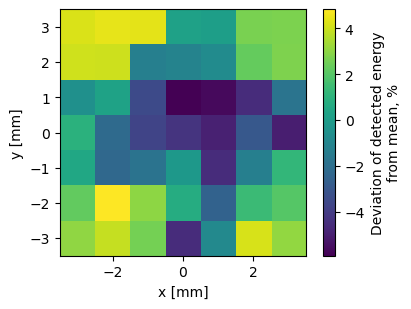

In [8]:
MAP_NAME_1 = "MAPCorner0"
MAP_NAME_2 = "MAPCorner1"

efficiency_map_1 = np.loadtxt("maps/" + MAP_NAME_1 + ".txt")
efficiency_map_2 = np.loadtxt("maps/" + MAP_NAME_2 + ".txt")

print("map 1", np.min(efficiency_map_1), np.max(efficiency_map_1))
print("map 2", np.min(efficiency_map_2), np.max(efficiency_map_2))

plt.figure(figsize=( 6.4*(2/3), 4.8*(2/3) ) )

plt.imshow(np.transpose(efficiency_map_1)[::-1,:], extent=(-3.5, 3.5, -3.5, 3.5))


plt.xlabel("x [mm]")
plt.ylabel("y [mm]")

cbar = plt.colorbar()
cbar.ax.set_ylabel("Deviation of detected energy\nfrom mean, %")